## Polimento e pequenios ajustes nos gráficos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Deixe o estilo padrão do seaborn
sns.set()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [37]:
# Carregar
df = sns.load_dataset("titanic")

# Selecionar apenas variáveis categóricas que vamos usar
# (você pode trocar por outras na mesma lógica)
#df = df[["sex", "class", "embarked", "survived"]]

# Tirar linhas com NA nas variáveis escolhidas (para facilitar nesta aula)
#df = df.dropna(subset=["sex", "class", "embarked", "survived"])

# Conferir 5 primeiras linhas
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Definindo o estilo: darkgrid, whitegrid, dark, white, ticks

In [14]:
sns.set_style("whitegrid")

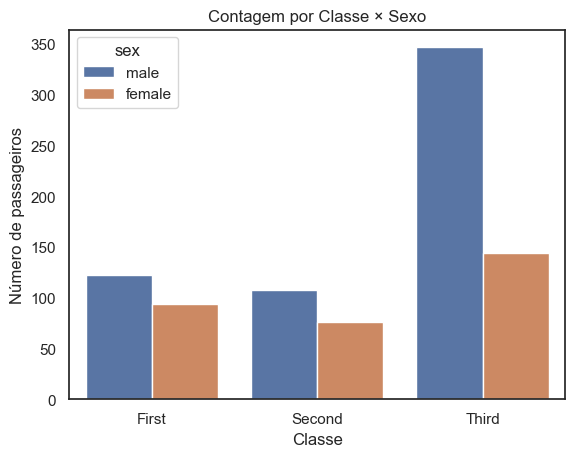

In [38]:
# Barras de contagem com seaborn (duas categóricas): class × sex

ax = sns.countplot(data=df, x="class", hue="sex")
ax.set_title("Contagem por Classe × Sexo")
ax.set_xlabel("Classe")
ax.set_ylabel("Número de passageiros")
plt.show()

In [39]:
cross_tab = pd.crosstab(df['class'], df['sex'], normalize='index') * 100

cross_tab

sex,female,male
class,,
First,43.518519,56.481481
Second,41.304348,58.695652
Third,29.327902,70.672098


In [40]:
cross_tab = cross_tab.reset_index().melt(id_vars='class', var_name='sex', value_name='percent')

cross_tab.head()

,class,sex,percent
0,First,female,43.518519
1,Second,female,41.304348
2,Third,female,29.327902
3,First,male,56.481481
4,Second,male,58.695652


In [41]:
sns.set_style("ticks")

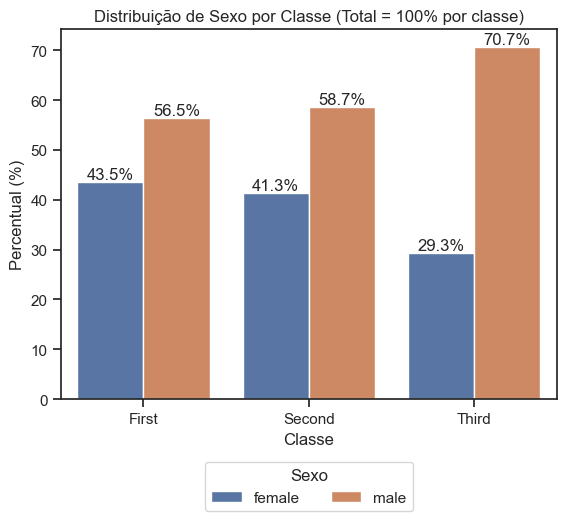

In [42]:
# Fazer o gráfico
ax = sns.barplot(data=cross_tab, x='class', y='percent', hue='sex')
ax.set_title("Distribuição de Sexo por Classe (Total = 100% por classe)")
ax.set_xlabel("Classe")
ax.set_ylabel("Percentual (%)")

plt.legend(
    title='Sexo',
    loc='upper center',         # posição horizontal (centro)
    bbox_to_anchor=(0.5, -0.15),# move para baixo
    ncol=2                      # número de colunas
)

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

## Onde colocar as legendas

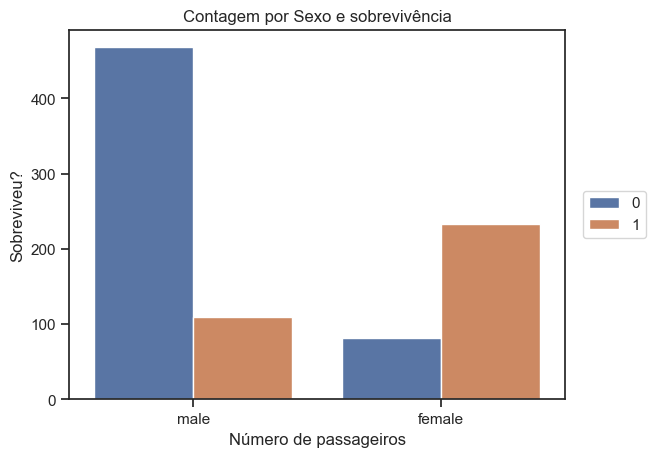

In [43]:
ax = sns.countplot(data=df, x="sex", hue="survived")
ax.set_title("Contagem por Sexo e sobrevivência")
ax.set_xlabel("Número de passageiros")
ax.set_ylabel("Sobreviveu?")


plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))


plt.show()


In [44]:
cross_tab2 = pd.crosstab(df['survived'], df['sex'], normalize='index') * 100

cross_tab2 = cross_tab2.reset_index().melt(id_vars='survived', var_name='sex', value_name='percentual')

cross_tab2

,survived,sex,percentual
0,0,female,14.754098
1,1,female,68.128655
2,0,male,85.245902
3,1,male,31.871345


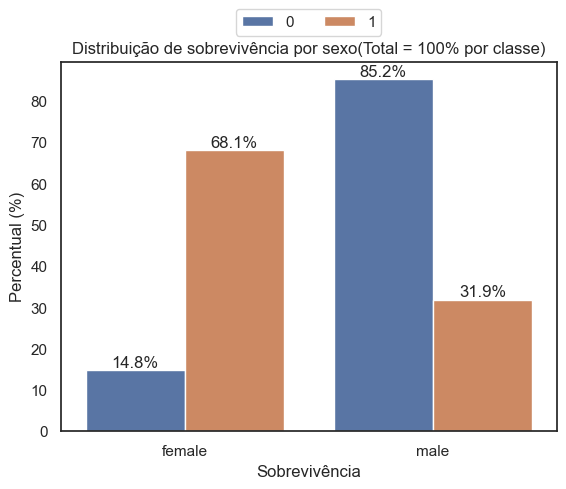

In [45]:
# Fazer o gráfico
sns.set_style("white")

ax = sns.barplot(data=cross_tab2, x='sex', y='percentual', hue='survived')
ax.set_title("Distribuição de sobrevivência por sexo(Total = 100% por classe)")
ax.set_xlabel("Sobrevivência")
ax.set_ylabel("Percentual (%)")

plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2)

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()


## Para virar o rótulo das categoraias do eixo-x e aumentar a letra do gráfico e mudar a cor

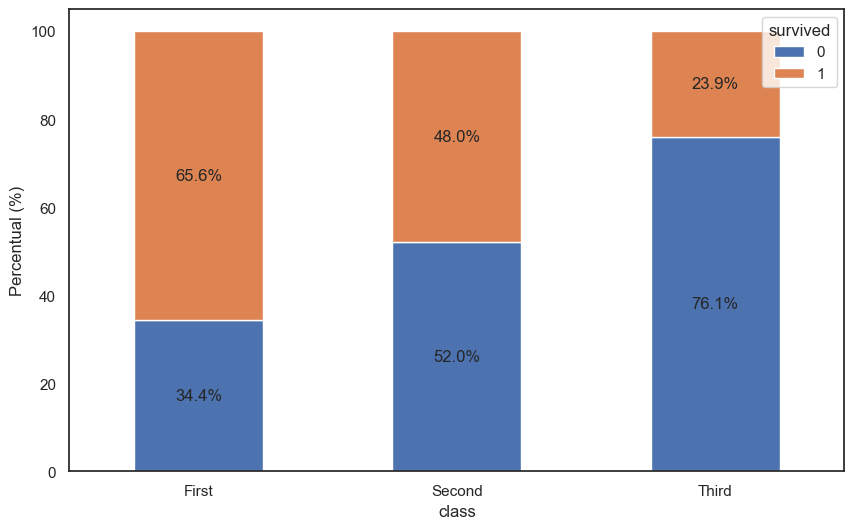

In [58]:
sns.color_palette("tab10")


# Calcular percentuais que somam 100%
cross_tab3 = pd.crosstab(df['class'], df['survived'], normalize='index') * 100

# Criar gráfico de barras segmentadas
ax = cross_tab3.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel("Percentual (%)")

# para virar o rotulo:

plt.xticks(rotation=0)


# Adicionar valores nos segmentos
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

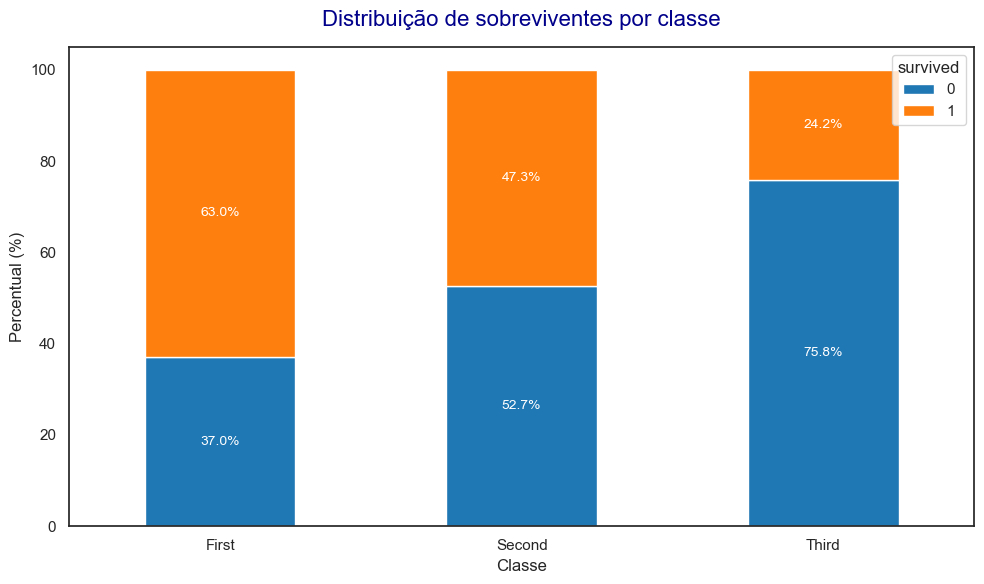

In [59]:


# Dados
df = sns.load_dataset('titanic')

# Calcular percentuais
cross_tab3 = pd.crosstab(df['class'], df['survived'], normalize='index') * 100

# Definir paleta
cores = sns.color_palette("tab10")

# Gráfico
ax = cross_tab3.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)
ax.set_ylabel("Percentual (%)", fontsize=12)
ax.set_xlabel("Classe", fontsize=12)

# Título customizado
ax.set_title("Distribuição de sobreviventes por classe", fontsize=16, color='darkblue', pad=15)

# Rotação dos rótulos do eixo X
plt.xticks(rotation=0)

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()
